<a href="https://colab.research.google.com/github/hBar2013/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/Kim_Lowry_Linear_Algebra_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Algebra

## 1.1 Graph vector $\vec{a}$ 

\begin{align}
\vec{a} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as LA

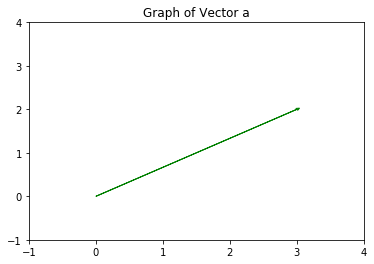

In [8]:
vector_a = [3, 2]
plt.arrow(0,0, vector_a[0], vector_a[1],head_width=.05, head_length=0.05, color ='green')
plt.xlim(-1,4)          
plt.ylim(-1,4)
plt.title("Graph of Vector a")
plt.show()

## 1.2 Find $||\vec{b}||$. What does the norm of a vector represent?
\begin{align}
\vec{b} = \begin{bmatrix} 17 & -4 & -2 & 1\end{bmatrix}
\end{align}


The norm of a vector represents its magnitude

In [11]:
vector_b = [17, -4, -2, 1]
LA.norm(vector_b)

17.60681686165901

## 1.3 Find $\vec{c} \cdot \vec{d}$ - Are these vectors orthogonal? Why or why not?

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

The dot product of vectors c and d is not = to 0, therefore these vectors are not perpendicular to each other, ie they are not orthogonal vectors

In [14]:
vector_c = [3, 7, -2, 12]
vector_d = [9, -7, 4, 6]
dp_cd = np.dot(vector_c, vector_d)
dp_cd

42

## 1.4 Find $E^{-1}$ and $E^{T}$

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [0]:
E = np.array([[7,4,2],
              [1,3,-1],
              [2,6,-4]])

In [16]:
E

array([[ 7,  4,  2],
       [ 1,  3, -1],
       [ 2,  6, -4]])

In [0]:
transpose_E = E.T


In [18]:
transpose_E

array([[ 7,  1,  2],
       [ 4,  3,  6],
       [ 2, -1, -4]])

In [19]:
inverse_E = LA.inv(E)
inverse_E

array([[ 0.17647059, -0.82352941,  0.29411765],
       [-0.05882353,  0.94117647, -0.26470588],
       [ 0.        ,  1.        , -0.5       ]])

# Intermediate Linear Algebra

## 2.1 Suppose that the number of customers at a ski resort as well as the number of inches of fresh powder (snow)  was recorded for 7 days. 

### Customers: [820, 760, 1250, 990, 1080, 1450, 1600]

### Inches of new snow: [0, 1, 7, 1, 0, 6, 4 ]

## Find the mean, variance, and standard deviation for both the number of customers and inches of new snow for the week. You may use library functions, dataframes, .describe(), etc. 



##ANSWER SUMMARY:

customer mean = 1135.714286
\
customer std = 314.264069
\
customer variance = 84653.06122448981
\
\
snow mean =  2.714286
\
snow std = 2.927700
\
snow variance = 7.346938775510203

In [20]:
import pandas as pd

customers = [820, 760, 1250, 990, 1080, 1450, 1600]
snow = [0, 1, 7, 1, 0, 6, 4]

df = pd.DataFrame({'customers': customers, 'snow': snow})

df.head()

,customers,snow
0,820,0
1,760,1
2,1250,7
3,990,1
4,1080,0


In [21]:
df.describe()

,customers,snow
count,7.000000,7.000000
mean,1135.714286,2.714286
std,314.264069,2.927700
min,760.000000,0.000000
25%,905.000000,0.500000
50%,1080.000000,1.000000
75%,1350.000000,5.000000
max,1600.000000,7.000000


In [23]:
print(df.customers.var(ddof=0))
print(df.snow.var(ddof=0))

84653.06122448981
7.346938775510203


## 2.2 Are the variances of the number of customers and inches of snow comparable? 
## Why or why not? 

## My Answer

They are not comparable as the variance retains unit information and are not standardized so it's difficult to make any statements about their comparitive variance.

## 2.3 Find the variance-covariance matrix for the number of customers and inches of snow at the ski resort. 

In [0]:
cov_cs = np.cov(df.customers, df.snow, ddof=0)

In [25]:
cov_cs

array([[8.46530612e+04, 5.74489796e+02],
       [5.74489796e+02, 7.34693878e+00]])

# PCA

## 3.1 Standardize the data so that it has a mean of 0 and a standard deviation of 1. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing the data or PCA.

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [45]:
# Let me get you some data to start you off.
import pandas as pd

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

# Look at the data
df.head()

,Country,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,North Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [0]:
df = df.set_index('Country')

In [47]:
df.shape

(4, 17)

In [48]:
df.head()

,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
Country,,,,,,,,,,,,,,,,,
England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
North Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [0]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [50]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [51]:
print(data_scaled.mean(axis=0))
print(data_scaled.std(axis=0))

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  6.93889390e-18 -5.55111512e-17  0.00000000e+00  5.55111512e-17
  0.00000000e+00  0.00000000e+00 -5.55111512e-17  0.00000000e+00
  6.93889390e-18 -5.55111512e-17 -2.77555756e-17  0.00000000e+00
  5.55111512e-17]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


## 3.2 Perform PCA on the data and graph Principal Component 1 against Principal Component 2. (You may use library functions)

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>

In [0]:
pca = PCA(2)

In [53]:
pca.fit(data_scaled)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [55]:
columns = ['pca_%i' % i for i in range(2)]
df_pca = pd.DataFrame(pca.transform(df), columns=columns, index=df.index)
df_pca.head()

,pca_0,pca_1
Country,,
England,-883.473318,-271.928360
Wales,-1036.074816,-396.843893
Scotland,-794.916330,-90.211609
North Ireland,-504.399729,-480.735419


In [0]:
import seaborn as sns

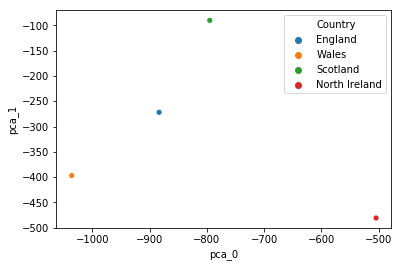

In [60]:
ax = sns.scatterplot(x=df_pca.pca_0, y=df_pca.pca_1, hue=df_pca.index)
...                   

# Clustering

## 4.1 Use K-Means to cluster the following data and then graph your results. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing clustering.

Prioritize calculating the clusters over graphing them. 

Scikit-Learn K-Means Documentation:

<https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

##Analysis

Of course there is no way to know for sure since I can't test either of these modesl, but I am liking the 5 cluster results here. With the 4 cluster run it looks to me like cluster 0 (in red) has two lobes that would be better characterized by individual centroids for each lobe. As you can see in the 5 cluster graph what was formerly the single cluster 0 has been fairly nicely linearly separated into clusters 2 and 4 although the separation is imperfect with some overlap between the 2 clusters at x = -2.4 and y between approximately -6 to -7. With such a small sample it's hard to know for sure if those clusters do represent a meaningful differentiation between the data in those clusters, but given what we do have I believe the 5 cluster result is the better model. 

In [58]:
points = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/points.csv')
points.head()

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


In [61]:
points.describe()

,x,y
count,200.000000,200.000000
mean,-2.323298,-3.422869
std,4.556513,5.580888
min,-10.118473,-11.095795
25%,-4.619520,-8.246848
50%,-3.373794,-5.307697
75%,-0.427175,3.360028
max,7.807885,5.883054


In [0]:
from sklearn.cluster import KMeans 

In [0]:
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(points)
    sum_of_squared_distances.append(km.inertia_)

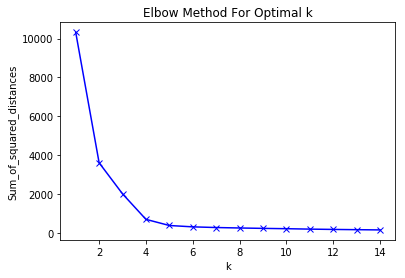

In [67]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [68]:
# with 4 clusters
kmeans = KMeans(n_clusters=4)
kmeans.fit(points)
labels = kmeans.labels_

print(labels)

[2 0 0 2 0 0 2 2 3 0 0 0 0 0 2 0 2 0 0 1 2 1 1 1 0 0 0 3 0 0 0 0 0 1 0 0 0
 0 3 0 0 1 3 3 3 0 0 0 2 0 1 2 2 3 1 0 0 3 3 2 1 0 2 3 1 3 1 3 2 3 0 0 0 0
 1 1 0 0 3 1 3 0 0 0 3 0 3 0 0 1 3 0 1 0 0 0 0 0 0 0 0 0 2 0 0 1 2 2 2 1 0
 1 0 2 0 0 3 3 1 3 1 0 0 2 0 2 0 1 3 2 0 2 0 2 3 3 0 1 2 0 3 0 0 1 0 3 0 3
 2 0 0 0 2 1 0 3 0 1 0 2 0 0 3 2 1 1 0 3 0 0 2 0 3 1 0 0 0 0 0 2 0 0 0 0 0
 0 2 1 3 0 0 2 1 2 0 3 1 1 0 0]


In [69]:
new_series = pd.Series(labels)
points['clusters'] = new_series.values

points.head()

,x,y,clusters
0,-7.846803,-3.421277,2
1,-3.554323,-6.884729,0
2,-0.192822,-9.671030,0
3,-6.401456,-5.223972,2
4,-0.804026,-9.704457,0


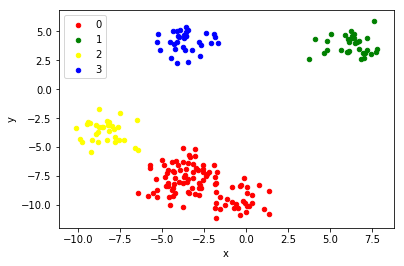

In [71]:
colors = {0:'red', 1:'green', 2:'yellow', 3:'blue'}
fig, ax = plt.subplots()
grouped = points.groupby('clusters')
for key, group in grouped:
      group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()
    

In [72]:
# with 5 clusters
kmeans = KMeans(n_clusters=5)
kmeans.fit(points)
labels = kmeans.labels_

print(labels)

[0 4 2 0 2 4 0 0 3 4 4 4 2 4 0 2 0 4 4 1 0 1 1 1 4 4 2 3 4 4 4 4 2 1 4 4 4
 4 3 2 2 1 3 3 3 4 4 4 0 2 1 0 0 3 1 2 4 3 3 0 1 2 0 3 1 3 1 3 0 3 4 4 4 4
 1 1 4 4 3 1 3 4 4 4 3 4 3 4 4 1 3 4 1 4 2 4 4 4 4 2 4 4 0 4 4 1 0 0 0 1 2
 1 4 0 2 4 3 3 1 3 1 2 4 0 4 0 4 1 3 0 2 0 4 0 3 3 2 1 0 4 3 4 4 1 2 3 4 3
 0 4 4 2 0 1 4 3 2 1 4 0 2 4 3 0 1 1 2 3 2 2 0 2 3 1 2 4 4 4 4 0 4 2 4 4 2
 4 0 1 3 2 4 0 1 0 4 3 1 1 2 2]


In [73]:
new_series = pd.Series(labels)
points['clusters'] = new_series.values

points.head()

,x,y,clusters
0,-7.846803,-3.421277,0
1,-3.554323,-6.884729,4
2,-0.192822,-9.671030,2
3,-6.401456,-5.223972,0
4,-0.804026,-9.704457,2


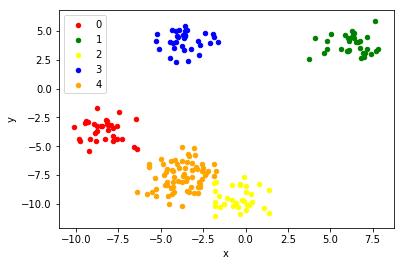

In [74]:
colors = {0:'red', 1:'green', 2:'yellow', 3:'blue', 4:'orange'}
fig, ax = plt.subplots()
grouped = points.groupby('clusters')
for key, group in grouped:
      group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()